# Loan Prediction Project


In [63]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1. Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

2. Load Dataset

In [65]:
data = pd.read_csv (r"c:\Users\priya\Music\test_Y3wMUE5_7gLdaTN.csv")
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

3. Data Understanding

In [66]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean 

4. Data Cleaning


In [67]:
data = data.dropna()
print(data)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
5    LP001054   Male     Yes          0  Not Graduate           Yes   
..        ...    ...     ...        ...           ...           ...   
361  LP002969   Male     Yes          1      Graduate            No   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1

In [68]:
print(data.isnull().sum)


<bound method DataFrame.sum of      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
4      False   False    False       False      False          False   
5      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
361    False   False    False       False      False          False   
362    False   False    False       False      False          False   
363    False   False    False       False      False          False   
365    False   False    False       False      False          False   
366    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              False              False    

* Convert categorical Data into Numerical Data

In [122]:
data = pd.get_dummies(data,drop_first=True)
print(data)
print(data.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1               3076               1500       126.0             360.0   
2               5000               1800       208.0             360.0   
3               2340               2546       100.0             360.0   
4               3276                  0        78.0             360.0   
..               ...                ...         ...               ...   
362             4009               1777       113.0             360.0   
363             4158                709       115.0             360.0   
364             3250               1993       126.0             360.0   
365             5000               2393       158.0             360.0   
366             9200                  0        98.0             180.0   

     Credit_History  Loan_ID_LP001022  Loan_ID_LP001031  Loan_ID_LP001035  \
0               1.0             False         

* Data preprocessing Handling Missing value and Encoading

In [123]:
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)
print(data.head())


   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
4             3276                  0        78.0             360.0   
5             2165               3422       152.0             360.0   

   Credit_History  Loan_ID_LP001022  Loan_ID_LP001031  Loan_ID_LP001035  \
0             1.0             False             False             False   
1             1.0              True             False             False   
2             1.0             False              True             False   
4             1.0             False             False             False   
5             1.0             False             False             False   

   Loan_ID_LP001051  Loan_ID_LP001054  ...  Loan_ID_LP002989  Gender_Male  \
0             False             False  ...   

5. Loading Training Data


In [124]:
train_data = pd.read_csv(r"c:\Users\priya\Music\train_u6lujuX_CVtuZ9i.csv")
train_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [125]:
print (train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

6.  Import Required ML Modules


In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [195]:
data = pd.read_csv (r"c:\Users\priya\Music\test_Y3wMUE5_7gLdaTN.csv")
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

7. Exploratory Data Analysis (EDA)

* This step helps to understand dataset structure, data types, missing values,
statistical summary, and preview of dataset records.


In [196]:
print(train_data.info())
print(train_data.describe())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
None
           Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.817590    0.

In [197]:
print(train_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


* Data Cleaning – Filling Missing Values


In [198]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
print(train_data)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

C:\Users\priya\AppData\Local\Temp\ipykernel_11952\2066449369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_11952\2066449369.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [199]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(), inplace=True)
print(train_data)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

C:\Users\priya\AppData\Local\Temp\ipykernel_11952\3235392243.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_11952\3235392243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [200]:
print(train_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [201]:
train_data.replace({
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Urban': 2, 'Semiurban': 1, 'Rural': 0},
    'Loan_Status': {'Y': 1, 'N': 0}
}, inplace=True)
print(train_data)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [202]:
train_data['Dependents'].replace('3+', 3, inplace=True)
train_data['Dependents'] = train_data['Dependents'].astype(int)
print(train_data)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

C:\Users\priya\AppData\Local\Temp\ipykernel_11952\1835305206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Dependents'].replace('3+', 3, inplace=True)


In [203]:
print(train_data.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5849   
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2    

In [204]:
X = train_data.drop('Loan_Status', axis=1)
Y = train_data['Loan_Status']
print(X.head())
print(Y.head())


   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5849   
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  
0              2  
1              0  
2              2  
3              2  
4              2  
0 

In [205]:
train_data.replace({
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Urban': 2, 'Semiurban': 1, 'Rural': 0},
    'Loan_Status': {'Y': 1, 'N': 0}
}, inplace=True)
print(train_data)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [206]:
print(train_data.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5849   
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2    

In [207]:
X = train_data.drop('Loan_Status', axis=1)
Y = train_data['Loan_Status']
print(X.head())
print(Y.head())


   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5849   
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  
0              2  
1              0  
2              2  
3              2  
4              2  
0 

* In this step, the dataset is divided into training and testing sets.
80% of data is used for model training and 20% is used for testing.


In [208]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
print(X_train.shape)
print(X_test.shape)


(491, 11)
(123, 11)


In [209]:
from sklearn.model_selection import train_test_split


In [210]:
X = train_data.drop('Loan_Status', axis=1)
Y = train_data['Loan_Status']
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

8. Train-Test Data Splitting

In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)


(491, 11)
(123, 11)


In [212]:
train_data = pd.get_dummies(train_data, drop_first=True)
print(train_data)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [213]:
print(train_data.columns)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [214]:
X = train_data.drop('Loan_Status', axis=1)
Y = train_data['Loan_Status']

print("X Data:")
print(X)

print("Y Data:")
print(Y)


X Data:
     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Am

In [215]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print("X Train:")
print(X_train)

print("X Test:")
print(X_test)


X Train:
     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
83        1        1           0          1              0             6000   
90        1        1           0          1              0             2958   
227       1        1           2          1              0             6250   
482       1        1           0          1              0             2083   
464       1        0           0          1              0             4166   
..      ...      ...         ...        ...            ...              ...   
71        1        1           2          0              1             1875   
106       1        1           2          1              0            11417   
270       0        0           0          1              0             3237   
435       0        1           0          1              0            10047   
102       1        1           0          1              0            13650   

     CoapplicantIncome  LoanAmount  Loan_A

In [216]:

print(train_data.columns)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [217]:
X = train_data.drop('Loan_Status', axis=1)
Y = train_data['Loan_Status']

print(X.head())
print(Y.head())


   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5849   
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  
0              2  
1              0  
2              2  
3              2  
4              2  
0 

In [218]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)


(491, 11)
(123, 11)


In [219]:

print(X_train.isnull().sum())


Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       40
Property_Area         0
dtype: int64


In [220]:
print(train_data.columns)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [221]:
print(train_data.columns)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [222]:
X = train_data.drop('Loan_Status', axis=1)
Y = train_data['Loan_Status']

print(X.shape)
print(Y.shape)


(614, 11)
(614,)


In [223]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)


(491, 11)
(123, 11)


In [224]:
X_train = X_train.fillna(X_train.mean(numeric_only=True))
X_test = X_test.fillna(X_test.mean(numeric_only=True))

print(X_train.isnull().sum())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


* In this step, Logistic Regression algorithm is used to train the loan prediction model using training dataset.
The model learns patterns between input features and loan approval status.


9. Model Training

In [225]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, Y_train)

print("Model Training Completed")


Model Training Completed


c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [227]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, Y_train)

print("Model Training Completed")


Model Training Completed


10. Model Evaluation

In [228]:

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.7886178861788617


In [229]:
print("Predicted Values:", y_pred[:10])
print("Actual Values:", Y_test[:10].values)


Predicted Values: [1 1 1 1 1 1 1 1 1 1]
Actual Values: [1 1 1 1 1 1 1 1 0 0]


In [230]:
score = model.score(X_test, Y_test)
print("Model Score:", score)


Model Score: 0.7886178861788617


In [231]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[18 25]
 [ 1 79]]


In [232]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



11. Model Saving


In [233]:
import pickle

# Save model
pickle.dump(model, open("loan_model.pkl", "wb"))

print("Model Saved Successfully")


Model Saved Successfully


In [234]:
import pickle

loaded_model = pickle.load(open("loan_model.pkl", "rb"))

print("Model Loaded Successfully")


Model Loaded Successfully


12. Prediction using Saved Model

In [235]:
prediction = loaded_model.predict(X_test)

print("Prediction using loaded model:", prediction[:5])


Prediction using loaded model: [1 1 1 1 1]


In [236]:
from sklearn.metrics import accuracy_score

y_pred = loaded_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.7886178861788617


In [237]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[18 25]
 [ 1 79]]


13. Loan Status Distribution Visualization


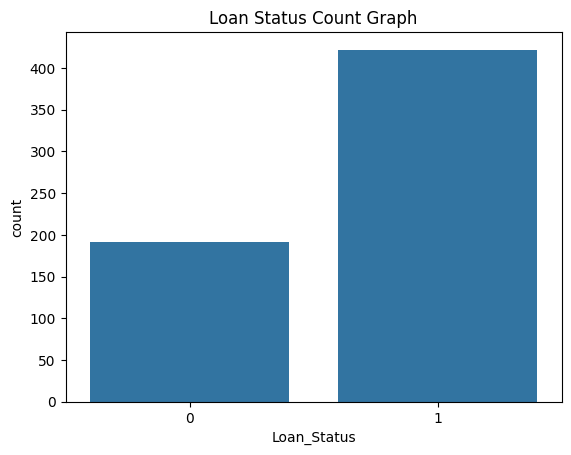

Loan Status Graph Displayed


In [238]:
sns.countplot(x='Loan_Status', data=train_data)
plt.title("Loan Status Count Graph")
plt.show()

print("Loan Status Graph Displayed")


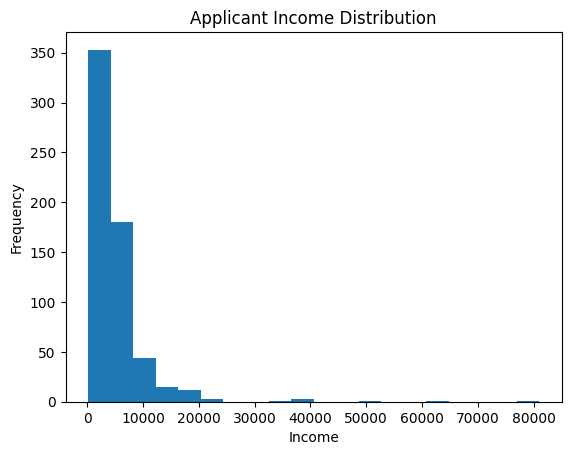

Income Distribution Graph Displayed


In [239]:
plt.hist(train_data['ApplicantIncome'], bins=20)
plt.title("Applicant Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

print("Income Distribution Graph Displayed")


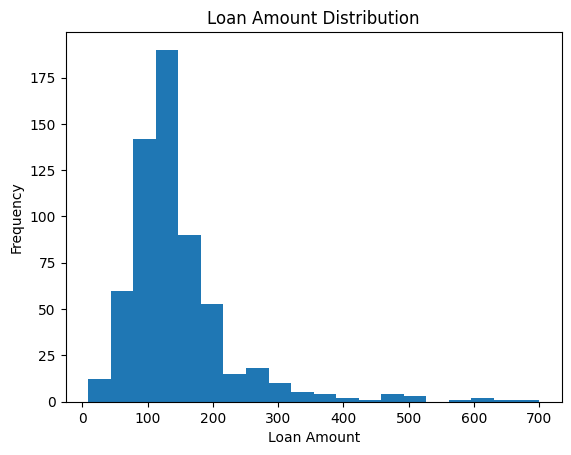

Loan Amount Graph Displayed


In [240]:
plt.hist(train_data['LoanAmount'], bins=20)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

print("Loan Amount Graph Displayed")


14. Feature Correlation Analysis Using Heatmap


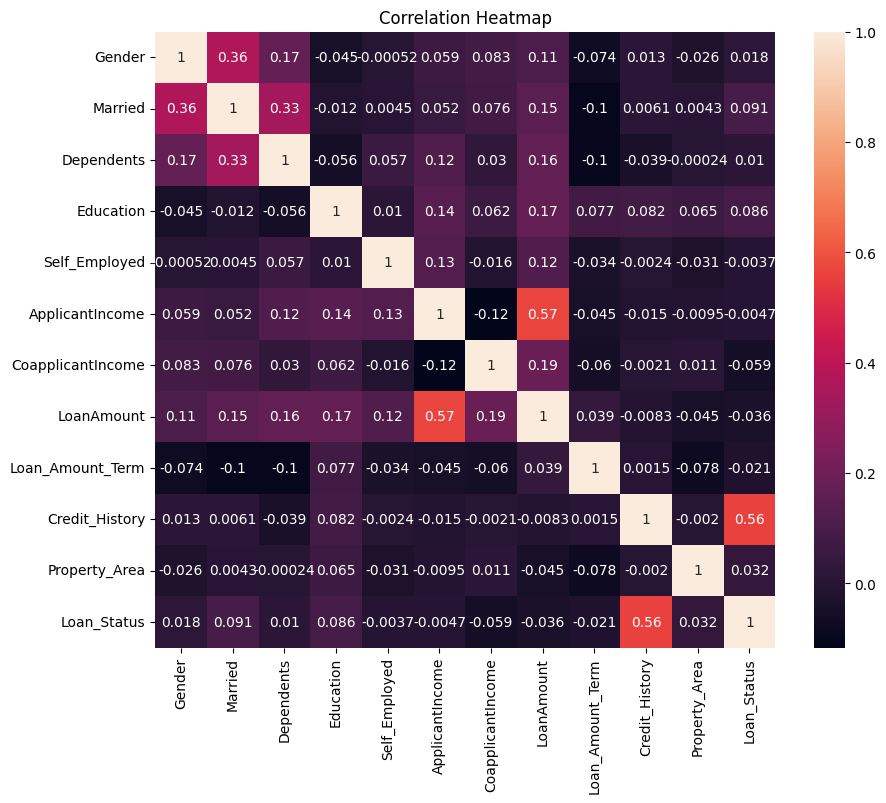

Heatmap Displayed


In [241]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

print("Heatmap Displayed")


15. Conclusion

In this project, a Loan Prediction Model was built using Machine Learning. The dataset was cleaned, processed, and trained using Logistic Regression. The model successfully predicts loan approval based on applicant details. Data visualization was also used to understand patterns and relationships in the dataset.

Thank you for reviewing this project.